In [2]:
import torch
import torchsde
import matplotlib.pyplot as plt

In [3]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Parameters for the SDE
mu = 0.1  # Drift coefficient
sigma = 0.2  # Diffusion coefficient
x0 = 1.0  # Initial value
t0, t1 = 0.0, 1.0  # Start and end times
dt = 0.01  # Time step
num_samples = 5  # Number of sample paths

In [4]:
# Define the SDE
class GeometricBrownianMotion(torchsde.SDEIto):
    def __init__(self, mu, sigma):
        super().__init__(noise_type='diagonal')
        self.mu = mu
        self.sigma = sigma

    def f(self, t, y):
        return self.mu * y

    def g(self, t, y):
        return self.sigma * y

In [5]:
# Initialize the SDE
sde = GeometricBrownianMotion(mu=mu, sigma=sigma)

# Time points
ts = torch.linspace(t0, t1, int((t1 - t0) / dt) + 1)

# Initial value, reshaped to be 2-dimensional with multiple samples
y0 = torch.tensor([[x0]] * num_samples)

# Solve the SDE
ys = torchsde.sdeint(sde, y0, ts)

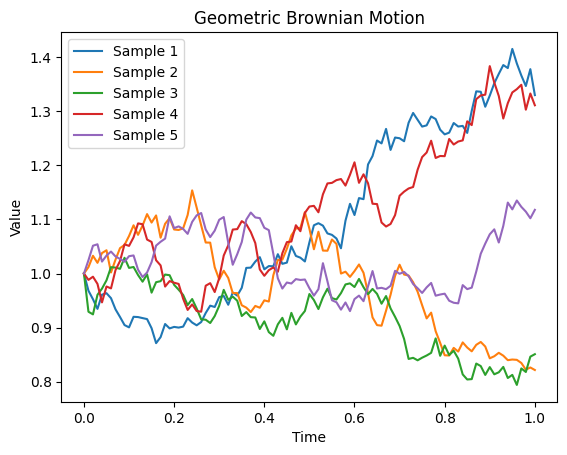

In [6]:
# Plot the results
for i in range(num_samples):
    plt.plot(ts.numpy(), ys[:, i, 0].numpy(), label=f'Sample {i+1}')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Geometric Brownian Motion')
plt.legend()
plt.show()